In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving A (1).JPG to A (1).JPG
Saving A (2).JPG to A (2).JPG
Saving A (3).JPG to A (3).JPG
Saving A (4).JPG to A (4).JPG
Saving A (5).JPG to A (5).JPG
Saving A (6).JPG to A (6).JPG
Saving A (7).JPG to A (7).JPG
Saving A (8).JPG to A (8).JPG
Saving A (9).JPG to A (9).JPG
Saving A (10).JPG to A (10).JPG
Saving A (11).JPG to A (11).JPG
Saving A (12).JPG to A (12).JPG
User uploaded file "A (1).JPG" with length 3182655 bytes
User uploaded file "A (2).JPG" with length 3112536 bytes
User uploaded file "A (3).JPG" with length 2324462 bytes
User uploaded file "A (4).JPG" with length 2263443 bytes
User uploaded file "A (5).JPG" with length 2741525 bytes
User uploaded file "A (6).JPG" with length 1990246 bytes
User uploaded file "A (7).JPG" with length 2180955 bytes
User uploaded file "A (8).JPG" with length 1637469 bytes
User uploaded file "A (9).JPG" with length 2804069 bytes
User uploaded file "A (10).JPG" with length 2123960 bytes
User uploaded file "A (11).JPG" with length 2482606 bytes
User 

In [ ]:
import cv2
input_list = []
pure_list = []

In [ ]:
import numpy as np
#import tensorflow as tf
from keras.models import *
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract
#from keras import backend as K


In [ ]:
for i in range(0,12):
    img = cv2.imread(f"A ({i+1}).JPG")
    resize_img = cv2.resize(img,(128,128))
    input_list.append(resize_img)
    pure = cv2.fastNlMeansDenoisingColored(resize_img, None, 10, 10, 7, 21)
    pure_list.append(pure)
input_list
pure_list



[array([[[172, 192, 174],
         [172, 192, 174],
         [172, 192, 174],
         ...,
         [146, 159, 118],
         [149, 163, 122],
         [149, 163, 122]],
 
        [[172, 192, 174],
         [172, 192, 174],
         [172, 192, 174],
         ...,
         [146, 159, 118],
         [149, 163, 122],
         [149, 163, 122]],
 
        [[172, 192, 174],
         [172, 192, 174],
         [172, 192, 174],
         ...,
         [146, 159, 118],
         [149, 163, 122],
         [149, 163, 122]],
 
        ...,
 
        [[134, 164, 195],
         [134, 164, 195],
         [134, 164, 195],
         ...,
         [113, 140, 168],
         [113, 140, 168],
         [113, 140, 168]],
 
        [[134, 164, 195],
         [134, 164, 195],
         [134, 164, 195],
         ...,
         [113, 140, 168],
         [113, 140, 168],
         [113, 140, 168]],
 
        [[134, 164, 195],
         [134, 164, 195],
         [134, 164, 195],
         ...,
         [113, 140, 168],
  

In [ ]:
input_arr = np.asarray(input_list)
pure_arr = np.asarray(pure_list)

In [ ]:
input_arr
pure_arr

array([[[[176, 190, 149],
         [176, 190, 149],
         [176, 190, 149],
         ...,
         [161, 171, 117],
         [161, 171, 117],
         [161, 171, 117]],

        [[176, 190, 149],
         [176, 190, 149],
         [176, 190, 149],
         ...,
         [161, 171, 117],
         [161, 171, 117],
         [161, 171, 117]],

        [[174, 188, 147],
         [174, 188, 147],
         [176, 190, 149],
         ...,
         [161, 171, 117],
         [161, 171, 117],
         [161, 171, 117]],

        ...,

        [[140, 168, 198],
         [140, 168, 198],
         [140, 168, 198],
         ...,
         [124, 148, 181],
         [124, 148, 181],
         [124, 148, 181]],

        [[140, 168, 198],
         [140, 168, 198],
         [140, 168, 198],
         ...,
         [124, 148, 181],
         [124, 148, 181],
         [124, 148, 181]],

        [[140, 168, 198],
         [140, 168, 198],
         [140, 168, 198],
         ...,
         [124, 148, 181],
        

In [ ]:
from keras.optimizers import Adam
inpt = Input(shape=(1000,1000,3))
# 1st layer, Conv+relu
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(inpt)
x = Activation('relu')(x)
# 15 layers, Conv+BN+relu
for i in range(15):
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization(axis=-1, epsilon=1e-3)(x)
    x = Activation('relu')(x)   
# last layer, Conv
x = Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
dnCnn_autoencoder = Model(inputs=inpt, outputs=x)
dnCnn_autoencoder.compile(optimizer='adam', loss='mse')
a_e = dnCnn_autoencoder.fit(input_arr,pure_arr, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 188ms/step - loss: 23396.5000
Epoch 2/100
1/1 [==============================] - 0s 140ms/step - loss: 23196.0000
Epoch 3/100
1/1 [==============================] - 0s 141ms/step - loss: 22915.5137
Epoch 4/100
1/1 [==============================] - 0s 141ms/step - loss: 22718.3926
Epoch 5/100
1/1 [==============================] - 0s 146ms/step - loss: 22553.9473
Epoch 6/100
1/1 [==============================] - 0s 143ms/step - loss: 22427.2246
Epoch 7/100
1/1 [==============================] - 0s 140ms/step - loss: 22310.5547
Epoch 8/100
1/1 [==============================] - 0s 140ms/step - loss: 22206.0879
Epoch 9/100
1/1 [==============================] - 0s 140ms/step - loss: 22119.8535
Epoch 10/100
1/1 [==============================] - 0s 144ms/step - loss: 22038.4121
Epoch 11/100
1/1 [==============================] - 0s 141ms/step - loss: 21957.8652
Epoch 12/100
1/1 [==============================] - 0s 141ms/step - loss: 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))




Saving Canon80D_GO_mean.JPG to Canon80D_GO_mean.JPG
User uploaded file "Canon80D_GO_mean.JPG" with length 430002 bytes


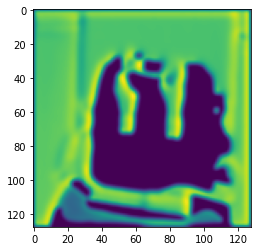

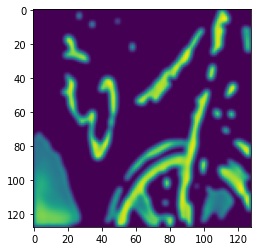

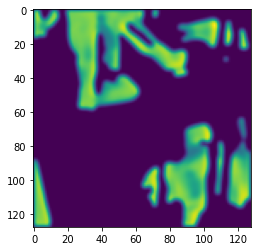

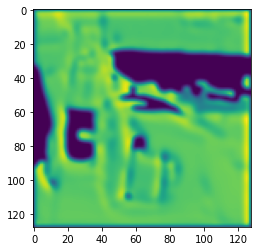

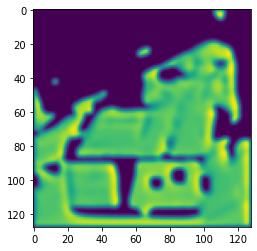

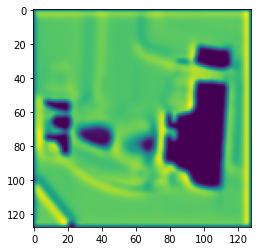

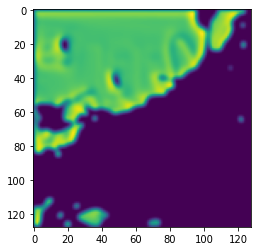

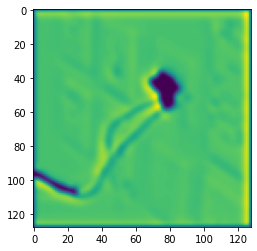

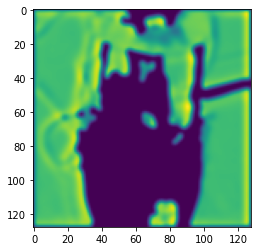

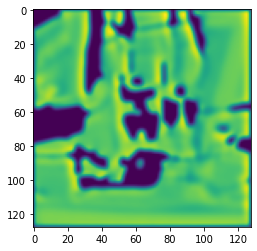

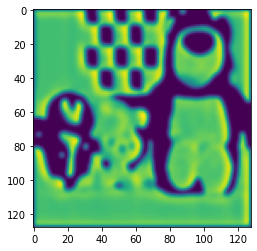

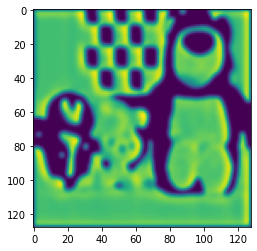

In [ ]:
test = cv2.imread("Canon80D_GO_mean.JPG")
resize_img_test = cv2.resize(img,(128,128))
prediction = dnCnn_autoencoder.predict(input_arr)
from matplotlib import pyplot as plt
for i in range(12):
  resized = cv2.resize(prediction[i], (128,128), interpolation = cv2.INTER_AREA)
  plt.subplot(), plt.imshow(resized)
  plt.show()